### Домашнее задание "Центральная предельная теорема своими руками"

Импортируем библиотеки, уставим стиль для красивого отображения графиков

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [8,5]

В качестве распределения выберем <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dgamma.html"> double gamma distribution</a>. Была выбрана из пакета scipy.stats практически случайно, принята за основу из-за своей интересной формы - функция имеет два "горба". В качестве параметра принимает shape - по факту это координата Х каждого "горба", взятая больше и меньше нуля.

In [54]:
distr = sts.dgamma(10)

Cоздадим выборку на достаточного количества элементов и отрисуем гистограмму и pdf на отрезке 1-30

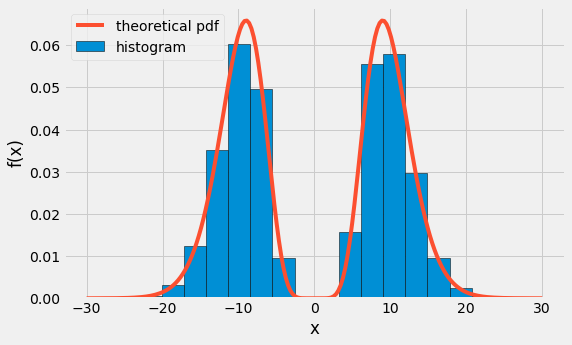

In [86]:
samples = distr.rvs(100000)

x = np.linspace(-30,30,200)
pdf = distr.pdf(x)
plt.hist(samples, normed=True, label='histogram', edgecolor = 'k', bins = 20)
plt.plot(x, pdf, label='theoretical pdf')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.show()

Проверим среднее и дисперсию полученного распределения

In [87]:
np.mean(samples)

0.020413713384162903

In [88]:
np.std(samples)

10.481264809239244

Средняя распределения данного распределения равна нулю, а дисперсия - параметру shape, в нашем случае 10.

Оценим распределение выборочного среднего выбранной случайной величины при разных объёмах выборок и построим гистограммы распределений их выборочных средних. Для наглядности построим теоретический pdf исходной выборки на том же графике

Итак, для выборок с разными количествами расчетов

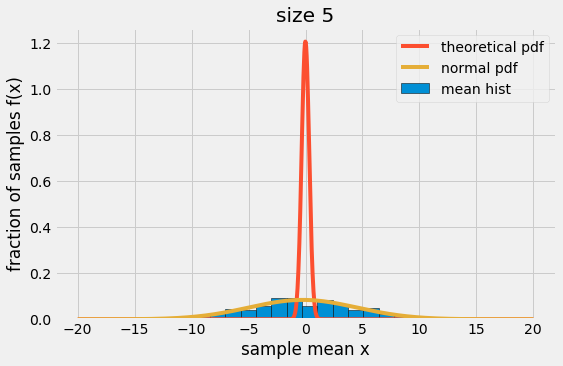

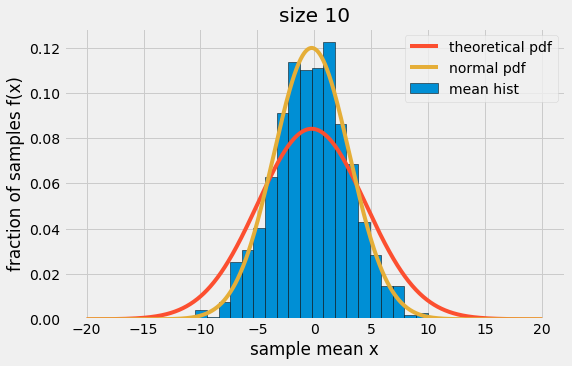

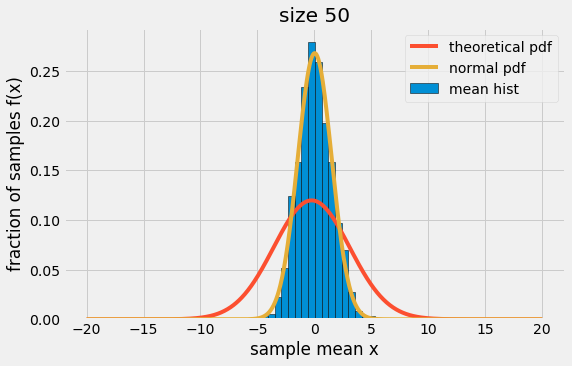

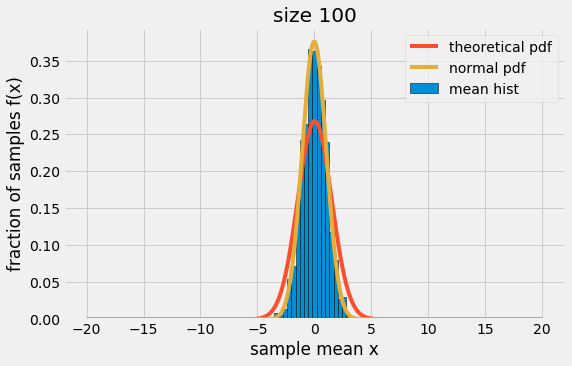

In [98]:
# запустим цикл на нужное количесвто расчетов для нужных выборок

for n in [5, 10, 50, 100]:

    # рассчитаем среднее из 1000 выборок, средние будут сранитьс я в списке sample_means
    sample_means = []
    for r in range(1000):
        sample_means.append(distr.rvs(n).mean())

    # сразу отрисуем на гистограмме что у нас получилось
    plt.hist(sample_means, 20, normed=True, label='mean hist', edgecolor = 'k')
    
    # теоретический pdf нормального распределения с параметрами исходной выборки
    norm_distr2 = sts.norm(0,10)
    x2 = np.linspace(-20, 20, 1000)
    pdf2 = norm_distr.pdf(x2)
    plt.plot(x2, pdf2, label='theoretical pdf')    
    
    # получим среднее и дисперсию данного распределения
    avg = np.mean(sample_means)
    disp = np.std(sample_means)
      
    # pdf нормального распределения с этими параметрами и его график
    norm_distr = sts.norm(avg, disp)
    x = np.linspace(-20, 20, 1000)
    pdf = norm_distr.pdf(x)
    plt.plot(x, pdf, label='normal pdf')
    
    # присвоим названия осям и дорисуем график  
    plt.legend()
    plt.title("size " + str(n))
    plt.ylabel('fraction of samples f(x)')
    plt.xlabel('sample mean x')
    plt.show()       


Таким образом, при увеличении объема выборки распределение средних значений сходится к нормальному распределению с параметрами исходной выборки.